# Decision Tree Classifier and Random Forest Classifier on Zoo Dataset

In [238]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [239]:
data= pd.read_csv(r"C:\Users\HP\Documents\Datasets\zoo.csv")
data

,animal_name,species,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,Mammal,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,Fish,4,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,Bird,2,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
96,wallaby,Mammal,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,Bug,6,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [240]:
data.shape

(100, 19)

In [242]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  100 non-null    object
 1   species      100 non-null    object
 2   class_type   100 non-null    int64 
 3   hair         100 non-null    int64 
 4   feathers     100 non-null    int64 
 5   eggs         100 non-null    int64 
 6   milk         100 non-null    int64 
 7   airborne     100 non-null    int64 
 8   aquatic      100 non-null    int64 
 9   predator     100 non-null    int64 
 10  toothed      100 non-null    int64 
 11  backbone     100 non-null    int64 
 12  breathes     100 non-null    int64 
 13  venomous     100 non-null    int64 
 14  fins         100 non-null    int64 
 15  legs         100 non-null    int64 
 16  tail         100 non-null    int64 
 17  domestic     100 non-null    int64 
 18  catsize      100 non-null    int64 
dtypes: int64(17), object(2)
memory

In [243]:
print("\nData Types:\n", data.dtypes)


Data Types:
 animal_name    object
species        object
class_type      int64
hair            int64
feathers        int64
eggs            int64
milk            int64
airborne        int64
aquatic         int64
predator        int64
toothed         int64
backbone        int64
breathes        int64
venomous        int64
fins            int64
legs            int64
tail            int64
domestic        int64
catsize         int64
dtype: object


In [244]:
data.describe()

,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
count,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,2.840000,0.43000,0.190000,0.580000,0.410000,0.230000,0.360000,0.560000,0.610000,0.820000,0.79000,0.08000,0.170000,2.85000,0.740000,0.130000,0.440000
std,2.111632,0.49757,0.394277,0.496045,0.494311,0.422953,0.482418,0.498888,0.490207,0.386123,0.40936,0.27266,0.377525,2.04186,0.440844,0.337998,0.498888
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,0.00000,0.000000,2.00000,0.000000,0.000000,0.000000
50%,2.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.00000,0.00000,0.000000,4.00000,1.000000,0.000000,0.000000
75%,4.000000,1.00000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.00000,0.000000,4.00000,1.000000,0.000000,1.000000
max,7.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,8.00000,1.000000,1.000000,1.000000


In [245]:
data.isna().sum()

animal_name    0
species        0
class_type     0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
dtype: int64

In [246]:
data.duplicated().sum()

0

<Axes: >

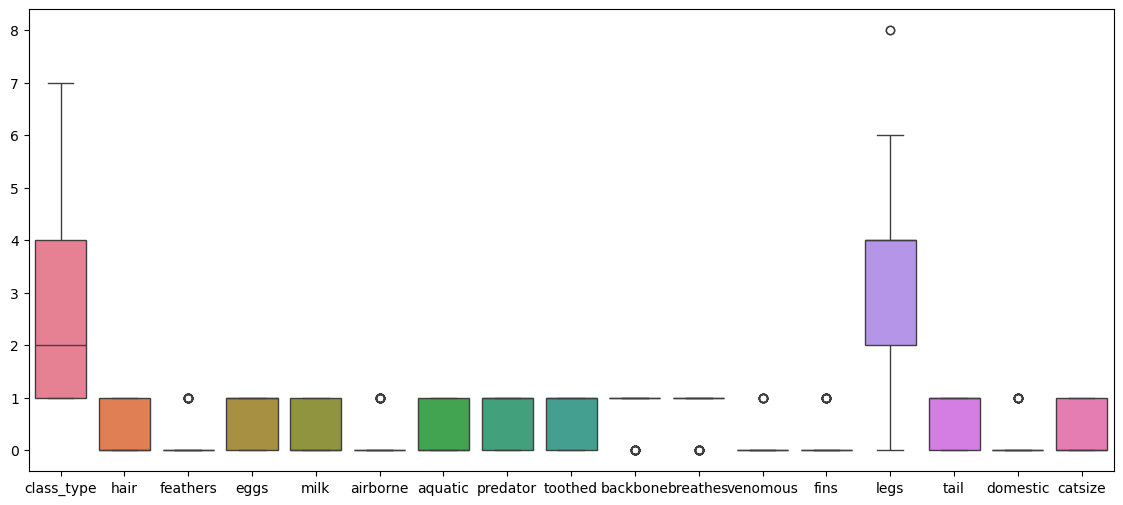

In [247]:
plt.figure(figsize= (14,6))
sns.boxplot(data)

In [248]:
data

,animal_name,species,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,Mammal,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bass,Fish,4,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,bear,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,boar,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,Bird,2,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
96,wallaby,Mammal,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,wasp,Bug,6,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,wolf,Mammal,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [249]:
#new_df= pd.DataFrame(data= data[:], columns= data.select_dtypes('int').columns)
#new_df
df= data.select_dtypes('int').copy()
df

,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,4,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,0,1,1,0,1,0,1,0,1,1,0,0,2,1,0,1
96,1,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,6,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [250]:
df.corr()

,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
class_type,1.000000,-0.568364,-0.193632,0.668088,-0.730042,0.030310,0.324838,0.057147,-0.480491,-0.828547,-0.518361,0.320702,0.097818,0.130255,-0.631082,-0.182850,-0.526976
hair,-0.568364,1.000000,-0.420660,-0.816046,0.877637,-0.186710,-0.483091,-0.166023,0.487425,0.196633,0.447809,-0.107214,-0.285535,0.392222,0.054339,0.204810,0.450866
feathers,-0.193632,-0.420660,1.000000,0.412140,-0.403739,0.643880,-0.044609,-0.084218,-0.605713,0.226915,0.249707,-0.142819,-0.219189,-0.202633,0.287081,0.040172,-0.121192
eggs,0.668088,-0.816046,0.412140,1.000000,-0.938420,0.368791,0.384959,0.021225,-0.638882,-0.345957,-0.388996,0.101569,0.169366,-0.222394,-0.227260,-0.153025,-0.511029
milk,-0.730042,0.877637,-0.403739,-0.938420,1.000000,-0.358973,-0.371061,-0.039322,0.624865,0.390567,0.429796,-0.245820,-0.160759,0.211665,0.216006,0.161422,0.571804
airborne,0.030310,-0.186710,0.643880,0.368791,-0.358973,1.000000,-0.162377,-0.281480,-0.586083,-0.115043,0.281783,0.014014,-0.247345,0.052048,-0.001083,0.071364,-0.340840
aquatic,0.324838,-0.483091,-0.044609,0.384959,-0.371061,-0.162377,1.000000,0.371014,0.044422,0.026029,-0.636291,0.086008,0.603426,-0.365061,-0.030397,-0.227969,-0.119195
predator,0.057147,-0.166023,-0.084218,0.021225,-0.039322,-0.281480,0.371014,1.000000,0.117301,0.056632,-0.259172,0.112872,0.186636,-0.105110,0.025720,-0.316288,0.136364
toothed,-0.480491,0.487425,-0.605713,-0.638882,0.624865,-0.586083,0.044422,0.117301,1.000000,0.585952,-0.059900,-0.066504,0.361870,-0.200318,0.320645,0.065231,0.337033
backbone,-0.828547,0.196633,0.226915,-0.345957,0.390567,-0.115043,0.026029,0.056632,0.585952,1.000000,0.205774,-0.245617,0.212039,-0.431761,0.731080,0.103712,0.362863


<Axes: >

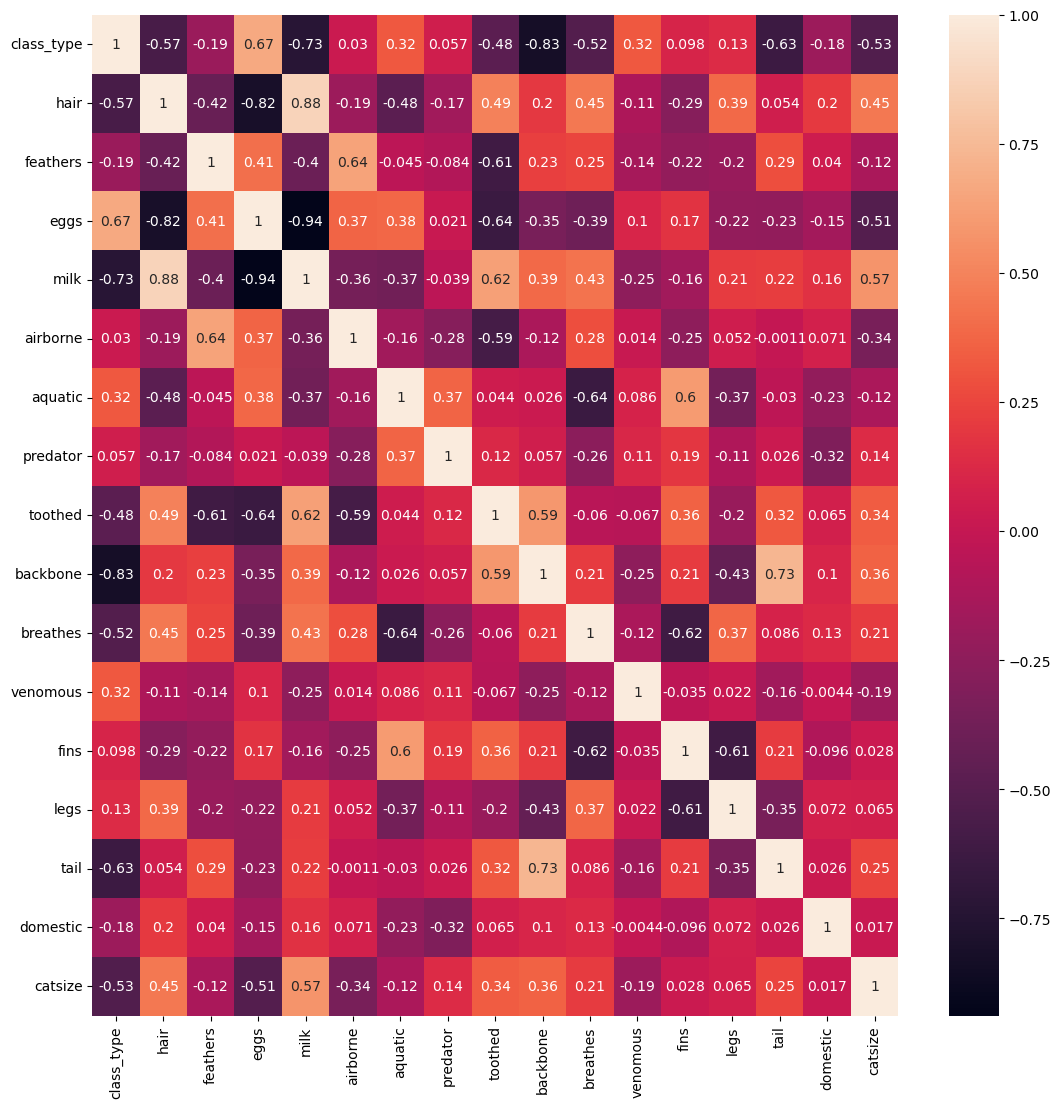

In [252]:
plt.figure(figsize= (13,13))
sns.heatmap(df.corr(), annot= True)

In [253]:
print("***** SPECIES NAME WITH THEIR CORRESPONDING CLASS_TYPE NUMBER *****")
unique_species = data.drop_duplicates(subset='species', keep='first')
sorted_unique_species = unique_species.sort_values(by='class_type')
sorted_unique_species = sorted_unique_species[['species', 'class_type']]
print(sorted_unique_species)

***** SPECIES NAME WITH THEIR CORRESPONDING CLASS_TYPE NUMBER *****
         species  class_type
0         Mammal           1
11          Bird           2
62       Reptile           3
2           Fish           4
25     Amphibian           5
24           Bug           6
13  Invertebrate           7


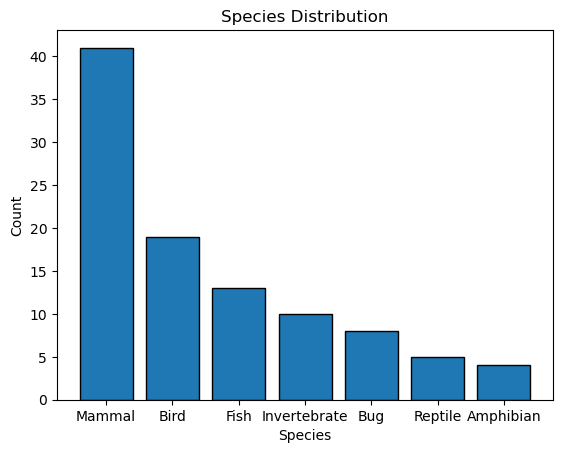

In [255]:
species_data= data['species'].value_counts()
plt.bar(x= species_data.index, height= species_data.values, edgecolor= 'black')
plt.title("Species Distribution")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

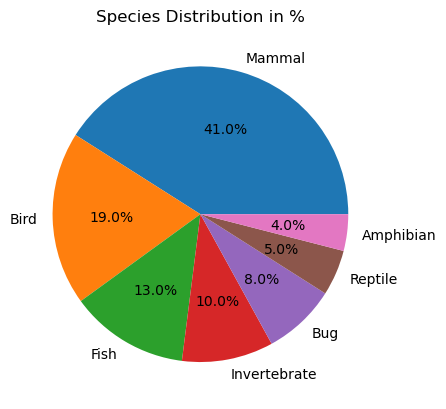

In [256]:
a= data['species'].value_counts()
plt.pie(x= a.values, labels= a.index, autopct= "%.1f%%")
plt.title("Species Distribution in %")
plt.show()

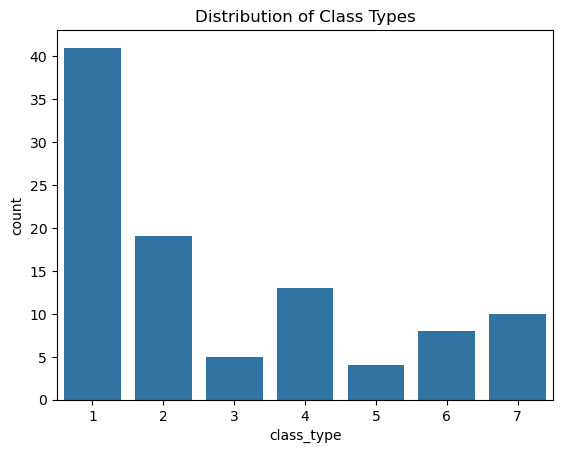

In [257]:
sns.countplot(x='class_type', data= data)
plt.title('Distribution of Class Types')
plt.show()

In [258]:
grouped_by_class= data.select_dtypes(include='number').groupby('class_type').mean()
print("\nGrouped by class_type (mean values):\n", grouped_by_class)


Grouped by class_type (mean values):
                hair  feathers     eggs  milk  airborne   aquatic  predator  \
class_type                                                                   
1           0.95122       0.0  0.02439   1.0  0.048780  0.146341  0.536585   
2           0.00000       1.0  1.00000   0.0  0.789474  0.315789  0.473684   
3           0.00000       0.0  0.80000   0.0  0.000000  0.200000  0.800000   
4           0.00000       0.0  1.00000   0.0  0.000000  1.000000  0.692308   
5           0.00000       0.0  1.00000   0.0  0.000000  1.000000  0.750000   
6           0.50000       0.0  1.00000   0.0  0.750000  0.000000  0.125000   
7           0.00000       0.0  0.90000   0.0  0.000000  0.600000  0.800000   

            toothed  backbone  breathes  venomous      fins      legs  \
class_type                                                              
1           0.97561       1.0       1.0  0.000000  0.097561  3.365854   
2           0.00000       1.0       1.0

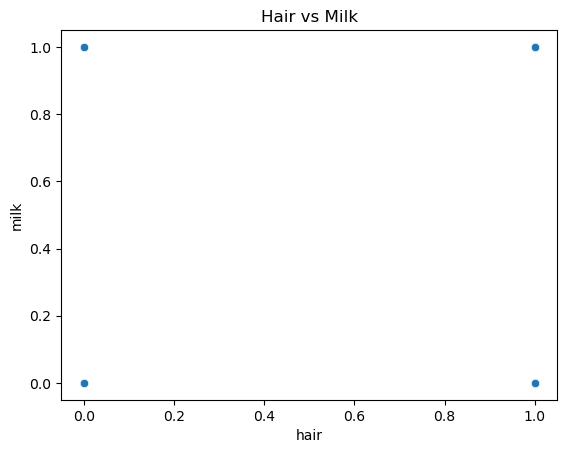

In [259]:
sns.scatterplot(x='hair', y='milk', data=data)
plt.title('Hair vs Milk')
plt.show()

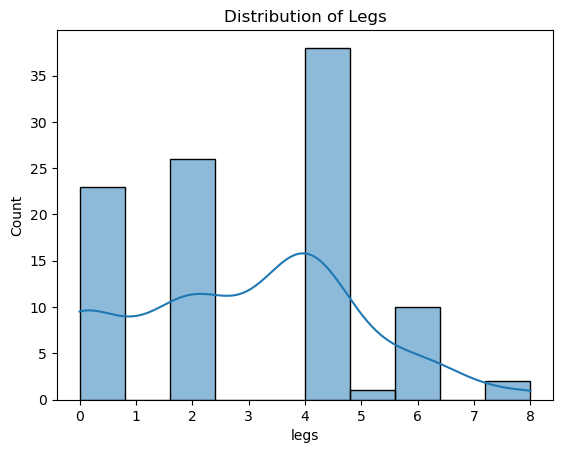

In [260]:
sns.histplot(data['legs'], kde=True)
plt.title('Distribution of Legs')
plt.show()

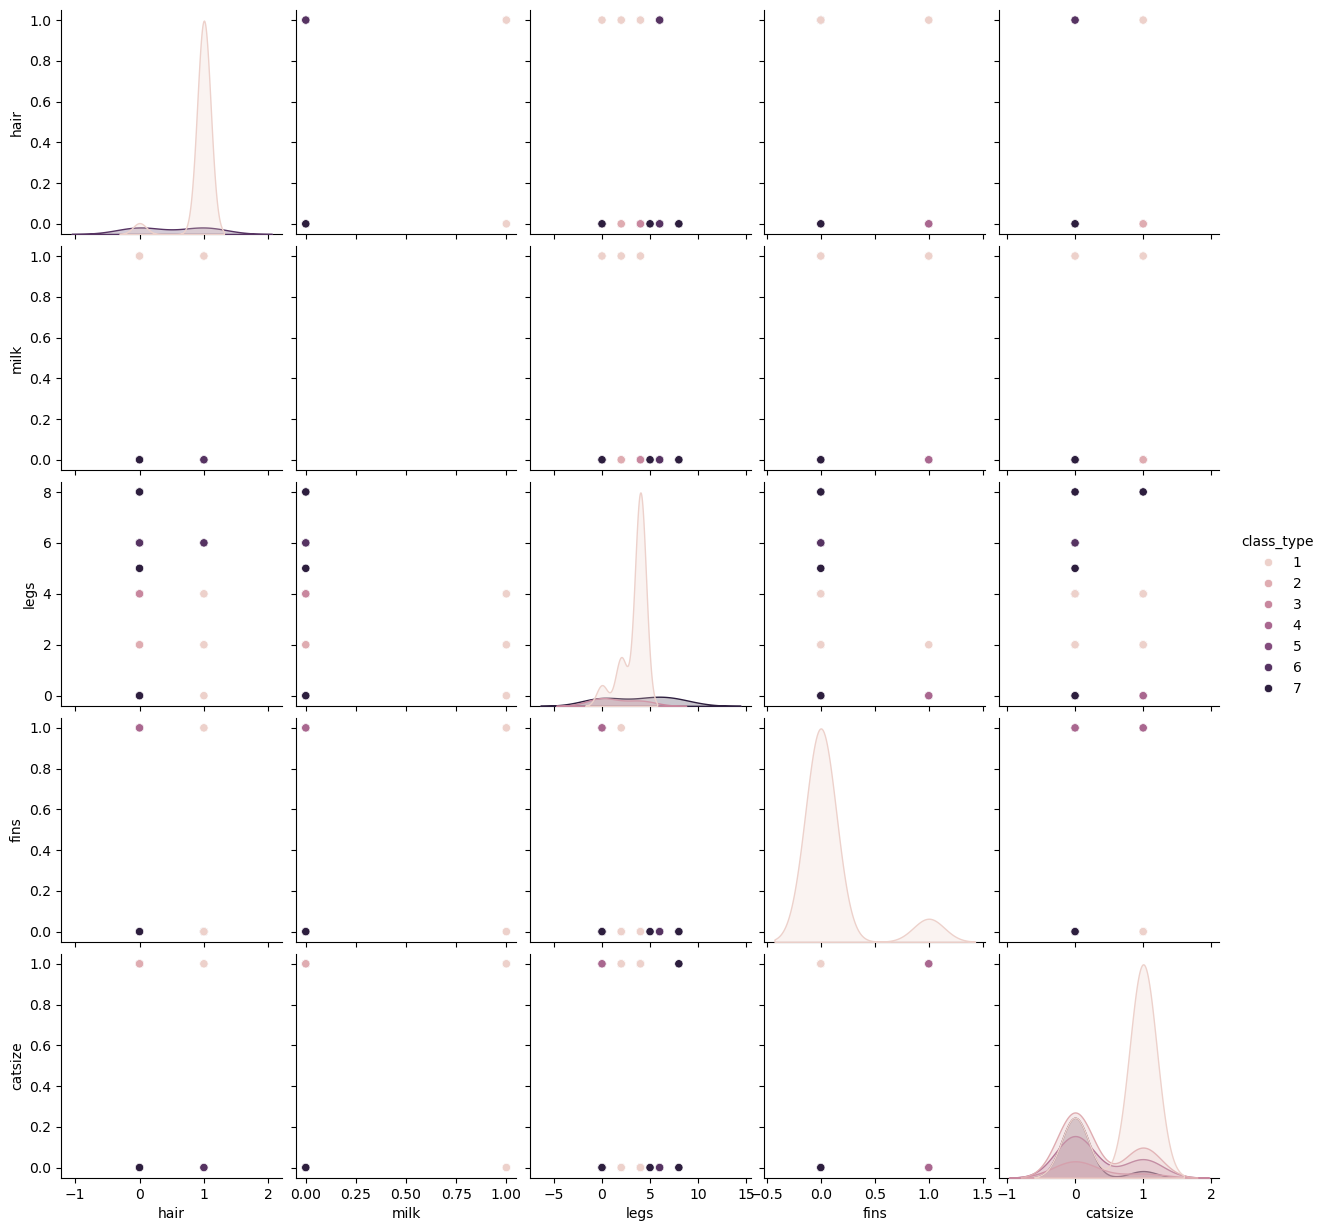

In [261]:
# Both give same result
#sns.pairplot(data[['hair', 'milk', 'legs', 'fins', 'catsize', 'class_type']], hue='class_type')
sns.pairplot(data, vars=['hair', 'milk', 'legs', 'fins', 'catsize'], hue='class_type')
plt.show()

In [262]:
milk_by_class = data.groupby('class_type')['milk'].mean()
print("\nAverage Milk Production by Class Type:\n", milk_by_class)


Average Milk Production by Class Type:
 class_type
1    1.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
Name: milk, dtype: float64


In [263]:
predators_by_class = data.groupby('class_type')['predator'].mean()
print("\nPredator Likelihood by Class Type:\n", predators_by_class)


Predator Likelihood by Class Type:
 class_type
1    0.536585
2    0.473684
3    0.800000
4    0.692308
5    0.750000
6    0.125000
7    0.800000
Name: predator, dtype: float64


In [264]:
aquatic_airborne = data.groupby('class_type')[['aquatic', 'airborne']].mean()*100
print("\nPercentage of Aquatic and Airborne Animals by Class Type:\n", aquatic_airborne)


Percentage of Aquatic and Airborne Animals by Class Type:
                aquatic   airborne
class_type                       
1            14.634146   4.878049
2            31.578947  78.947368
3            20.000000   0.000000
4           100.000000   0.000000
5           100.000000   0.000000
6             0.000000  75.000000
7            60.000000   0.000000


In [274]:
domestic_by_class = data.groupby('class_type')['domestic'].mean()
print("\nPercentage of Domestic Animals by Class Type:\n", domestic_by_class)


Percentage of Domestic Animals by Class Type:
 class_type
1    0.195122
2    0.157895
3    0.000000
4    0.076923
5    0.000000
6    0.125000
7    0.000000
Name: domestic, dtype: float64


## Data Splitting

In [276]:
X = df.drop('class_type', axis=1)
y = df['class_type']

In [277]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest Classifier

In [279]:
rf_classifier= RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier

RandomForestClassifier(random_state=42)

In [280]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [283]:
y_pred = rf_classifier.predict(X_test)
y_pred

array([2, 7, 1, 1, 1, 6, 1, 3, 1, 1, 4, 6, 4, 2, 2, 1, 4, 7, 4, 1],
      dtype=int64)

In [284]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       0.67      1.00      0.80         2
           3       1.00      0.33      0.50         3
           4       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.90      0.89      0.86        20
weighted avg       0.93      0.90      0.88        20


Confusion Matrix:
 [[8 0 0 0 0 0]
 [0 2 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 2 0]
 [0 0 0 0 0 2]]


<Axes: >

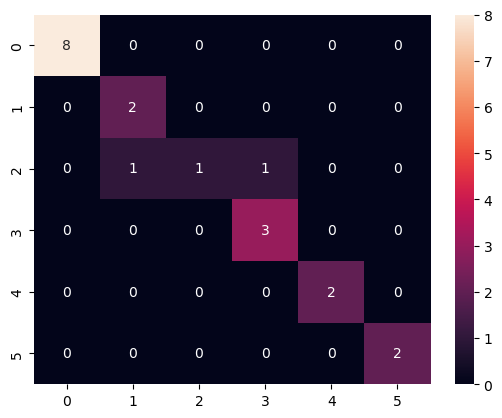

In [286]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot= True)

In [288]:
importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [291]:
print("\nFeature Importances:\n", feature_importance_df)


Feature Importances:
      Feature  Importance
3       milk    0.149098
1   feathers    0.120635
7    toothed    0.109064
2       eggs    0.107276
12      legs    0.099244
0       hair    0.091449
9   breathes    0.073793
8   backbone    0.064241
11      fins    0.044371
13      tail    0.042143
4   airborne    0.035295
5    aquatic    0.033112
6   predator    0.011670
15   catsize    0.010164
10  venomous    0.008341
14  domestic    0.000105


In [293]:
new_data1= [[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1]] # Mammal
new_data2= [[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1, 1, 1]] # Reptile
new_data3= [[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1]] # Bird
new_data4= [[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]] # Fish
new_data5= [[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 4, 1, 0, 0]] # Mammal

In [295]:
rf_classifier.predict(new_data1) # Predicted Bird

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [296]:
rf_classifier.predict(new_data2) # Predicted Amphibian

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [297]:
rf_classifier.predict(new_data3) # Predicted Bird

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [298]:
rf_classifier.predict(new_data4) # Predicted Amphibian

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [299]:
rf_classifier.predict(new_data5) # Predicted Mammal

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

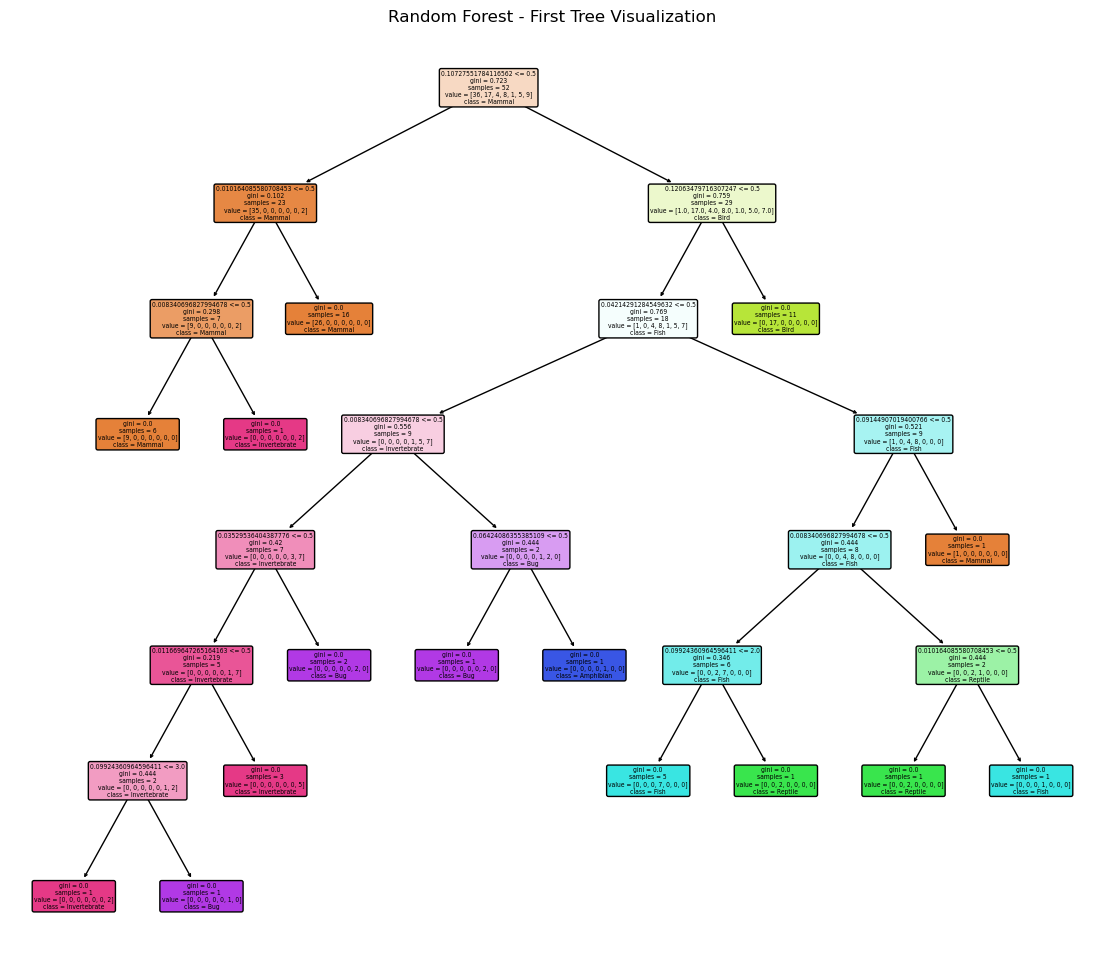

In [300]:
plt.figure(figsize=(14, 12))
tree.plot_tree(rf_classifier.estimators_[0], filled= True, feature_names= importances, class_names= ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'], rounded= True)
plt.title("Random Forest - First Tree Visualization")
plt.show()

## Decision Tree Classifier

In [302]:
dt_classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_classifier

DecisionTreeClassifier(max_depth=5, random_state=42)

In [303]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [304]:
y_pred = dt_classifier.predict(X_test)

In [305]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         2
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         3
           5       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.95        20
   macro avg       0.86      0.81      0.83        20
weighted avg       1.00      0.95      0.97        20


Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 2 0 0 0 0 0]
 [0 0 2 0 1 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [306]:
cv_scores = cross_val_score(dt_classifier, X, y, cv=5)  # 5-fold cross-validation
print("\nCross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.95 0.85 0.9  0.85 0.9 ]
Mean Cross-Validation Score: 0.89


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


In [307]:
importances = dt_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:\n", feature_importance_df)


Feature Importances:
      Feature  Importance
3       milk    0.419794
1   feathers    0.237634
11      fins    0.152515
8   backbone    0.078771
4   airborne    0.064358
5    aquatic    0.046928
0       hair    0.000000
2       eggs    0.000000
6   predator    0.000000
7    toothed    0.000000
9   breathes    0.000000
10  venomous    0.000000
12      legs    0.000000
13      tail    0.000000
14  domestic    0.000000
15   catsize    0.000000


In [308]:
new_data1= [[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1]] # Mammal
new_data2= [[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 4, 1, 1, 1]] # Reptile
new_data3= [[0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0, 1]] # Bird
new_data4= [[0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]] # Fish
new_data5= [[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 4, 1, 0, 0]] # Mammal

In [309]:
dt_classifier.predict(new_data1) # Predicted Bird

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [310]:
dt_classifier.predict(new_data2) # Predicted Amphibian

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([5], dtype=int64)

In [311]:
dt_classifier.predict(new_data3) # Predicted Bird

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2], dtype=int64)

In [312]:
dt_classifier.predict(new_data4) # Predicted Fish

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([4], dtype=int64)

In [313]:
dt_classifier.predict(new_data5) # Predicted Mammal

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

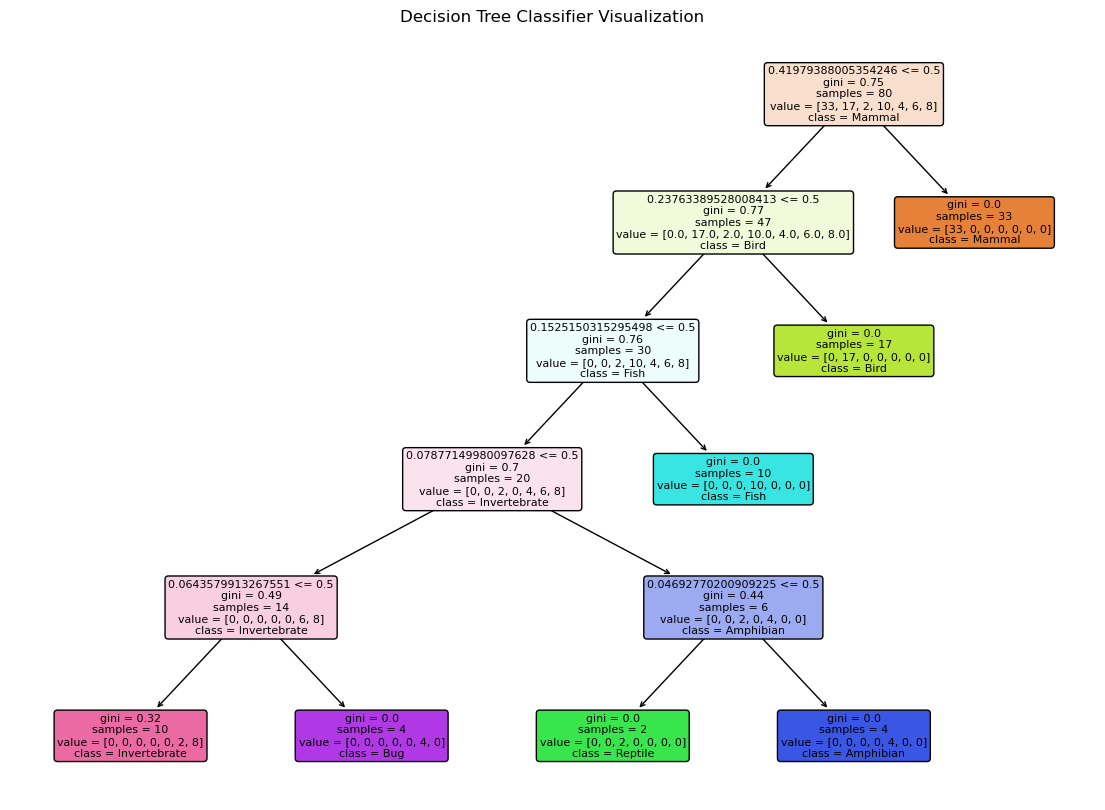

In [314]:
plt.figure(figsize=(14, 10))
tree.plot_tree(dt_classifier, precision= 2, filled= True, feature_names= importances, class_names= ['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'], rounded= True)
plt.title("Decision Tree Classifier Visualization")
plt.show()

## Cross - Validation Training

### Training data with explicit splitting, i.e., without using train_test_split

In [351]:
# Mammal : 0, Bird : 1, Reptile : 2, Fish : 3
data = {
    'class_type': [0, 0, 1, 2, 0, 3, 2, 1, 0, 3],
    'hair': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    'feathers': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    'eggs': [0, 0, 1, 1, 0, 0, 1, 1, 0, 1],
    'milk': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    'airborne': [0, 0, 1, 0, 0, 0, 0, 1, 0, 0],
    'aquatic': [0, 0, 0, 0, 0, 1, 1, 0, 0, 1],
    'predator': [1, 1, 0, 1, 1, 0, 1, 0, 1, 0],
    'toothed': [1, 1, 0, 1, 1, 1, 1, 0, 1, 1],
    'backbone': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'breathes': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'venomous': [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
    'fins': [0, 0, 0, 0, 0, 1, 0, 0, 0, 1],
    'legs': [4, 4, 2, 4, 4, 0, 4, 2, 4, 0],
    'tail': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
    'domestic': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0],
    'catsize': [1, 1, 0, 0, 1, 0, 0, 0, 1, 0]
}

In [353]:
zoo_df = pd.DataFrame(data)
zoo_df

,class_type,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1
1,0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1
2,1,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
3,2,0,0,1,0,0,0,1,1,1,1,1,0,4,1,0,0
4,0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1
5,3,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,0
6,2,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0
7,1,0,1,1,0,1,0,0,0,1,1,0,0,2,1,0,0
8,0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,1
9,3,0,0,1,0,0,1,0,1,1,1,0,1,0,1,0,0


In [355]:
X = zoo_df.drop('class_type', axis=1)
y = zoo_df['class_type']

In [357]:
dt_classifier = DecisionTreeClassifier(random_state=42)

cv_scores = cross_val_score(dt_classifier, X, y, cv= 3)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [1.         0.66666667 1.        ]
Mean Cross-Validation Score: 0.8888888888888888


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(


In [359]:
#This USER WARNING indicates that one of the classes in target variable y (the class labels or target values)
#contains very few samples (only 2 here) but performing cross-validation with n_splits=3.
#Class Imbalance :  Not possible to ensure that each fold contains at least one sample from every class.
#Problem with Split : each fold needs to have at least one sample from every class.
#                But if one class only has 2 samples, it can't be divided into 3 separate folds while maintaining stratification

In [361]:
cv_scores = cross_val_score(dt_classifier, X, y, cv= 2)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [1.  0.8]
Mean Cross-Validation Score: 0.9


# END